# An Overview of Generalized Linear Models

## Overview

This tutorial is an overview of Generalized Linear Models (GLM's). It is also a continuation of the Linear Regression post, "What is Linear Regression?", which can be found [here.](https://medium.com/towards-data-science/what-is-linear-regression-e44d2c4bf025)

### What are Generalized Linear Models?

Generalized Linear Models are extension of the typical Linear Regression or Ordinary Least Squares (OLS) model. Typically, when using Linear Regression, we assume the data follows a Normal Distribution a.k.a. Gaussian Distribution. However, data can behave according to other types of distributions. Because of this, we have Generalized Linear Models. The Generalized aspect of these models refers to the fact we can train a model with a different data distribution in mind (Gaussian, Poisson, Gamma, etc.) Which can provide a better model of your data.

### How does this relate to the Linear Regression equation?

The formula is similar, but extended! For a basic Linear Regression model, we can write the formula as: $$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon $$

The difference now is that we add a "link" function to the output, represented by _g()_: $$ g(y) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 ... + \beta_n x_n + \epsilon $$

### What is the difference?

#### The Link Function
We will now be predicting our values in association with this link function. An example would be a log link function, which would predict all of our outputs in a log-scale form. Previously, we were using our Linear Regression model to predict values on the same scale as our raw y-values. Using the log-scale example, if we wanted to get the real values we care about (revert back from log-scale) — we would run our predictions through an exponential function.

#### The Unit Deviance and Loss Function
The distribution your data follows really impacts the loss function you will want to use for your model training process. For example, if all of your data is non-negative (every value is positive) and you typically get low integer values (no decimals) — you may want to use a Poisson or Negative Binomial distribution. If your data ranges from negative to positive values and typically are float/double type values — then you may want to consider sticking to a Gaussian distribution. This is where you will need to conduct some investigation into what distribution works best for your data.

## Now for an Example

For this example, we will be using Scikit Learn. I am going to create some fake sample data about number of units sold for a product. As well as creating the columns for price, some measurement of the unit size, unit weight, and then the number of units sold.

### Imports

Here we are importing the libraries Numpy and Scikit Learn. Numpy is used to create data structures, while scikit learn is used for the modeling.

In [1]:
# Import numpy to create numpy arrays
import numpy as np

# Import a TweedieRegressor, which allows us to choose a link function and specify which type of data distribution
from sklearn.linear_model import TweedieRegressor

### Create some sample data

The data we have created here is some fake data on units of a product sold and their respective features associated with price, measurement, and weight.

In [46]:
# Creating sample data
price = [1.99, 1.49, 2.99, 3.99, 1.99, 2.49, 3.99, 2.99, 1.99, 0.99]
measurement = [0.2, 0.4, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.2, 0.5]
weight = [2, 4, 1, 1, 2, 1, 1, 1, 2, 5]
units_sold = np.array([1, 2, 1, 0, 2, 0, 0, 0, 1, 4])

#### Looking at the Distribution of our Target Variable

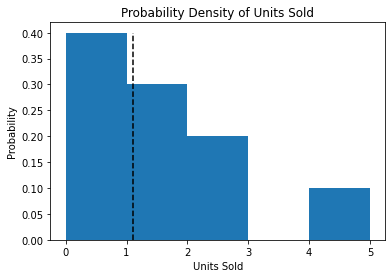

In [54]:
from matplotlib import pyplot as plt

plt.hist(units_sold, bins = [0, 1, 2, 3, 4, 5], density = True)
plt.vlines(np.mean(units_sold), ymin = 0, ymax = 0.4, linestyles = 'dashed')
plt.xlabel('Units Sold')
plt.ylabel('Probability')
plt.title('Probability Density of Units Sold')
plt.show()

Using the plot above, we can see our units sold falls roughly along a Poisson distribution. With a lambda or mean value of just greater than 1.

### Structuring the data

These two lines are to shape the data properly to use with scikit learn. We stack the multiple arrays (or the x's) into one numpy object. While also specifying the "shape" of the units_sold array.

In [62]:
# Combining the multiple lists into one object called "X"
X = np.column_stack([price, measurement, weight])
# Reshaping the units_sold list to work with scikit learn
y = units_sold.reshape(-1, 1)

### Creating a Generalized Linear Model

Now we can create a Generalized Linear Model, specifically using a log-link function and Poisson distribution

In [56]:
# Instantiating the model object
# Power = 0 represents Normal Distribution
# Power = 1 represents Poisson distribution
# For more information visit the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html#sklearn.linear_model.TweedieRegressor
poisson_model = TweedieRegressor(power = 1, link = 'log')

# Fitting the model with data
fitted_model = poisson_model.fit(X, y)

/Users/frankiecancino/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We have trained a generalized linear model, using a log-link function and assuming a Poisson distribution!

### What do our predictions look like?

#### Creating some test data

In [57]:
# Creating sample data
test_price = [0.99, 2.49, 1.49, 1.99, 4.99]
test_measurement = [0.4, 0.1, 0.3, 0.2, 0.1]
test_weight = [4, 1, 3, 2, 1]

# Combining the multiple lists into one object called "test_X"
test_X = np.column_stack([test_price, test_measurement, test_weight])

In [30]:
predictions = fitted_model.predict(test_X)
print(predictions)

[2.25191053 0.53114966 1.39136067 0.85966316 0.28747401]


Our predictions look fairly reasonable. Since this is all made-up sample data, it's hard to say if our model is doing well or not. However, all values are positive and follow our sample data to an extent.

### What would this look like with an Ordinary Least Squares Linear Regression model?

#### Train and use a Linear Regression Model

In [61]:
from sklearn.linear_model import LinearRegression

# Instantiating the model object
ols_model = LinearRegression()

# Fitting the model with data
fitted_ols_model = ols_model.fit(X, y)
ols_predictions = ols_model.predict(test_X)
print(ols_predictions)

[[ 2.85362319]
 [ 0.41884058]
 [ 2.04202899]
 [ 1.23043478]
 [-0.23333333]]


The predictions don't look too bad, but notice that one of the predictions ends up being negative. This is because the Linear Regression model is assuming a Gaussian Distribution as its value domain and therefore is allowing negative value predictions because of this assumption.

## What could you do next to improve your model?

Some next steps on how to make your model better include:
- Collect more data. The more (good) data the better for machine learning models.
- Understand your data. Really look into the behavior and find out which distribution matches your real-world datasets.
- Normalize your data. It makes learning difficult for the model when you don't scale your data since it could weigh features, that just have higher values naturally, more than others.
- Regularization. This attempts to use features or inputs that impact the model more, while weighing others lower. Specifically, Lasso or Ridge regression.
- Look into Additive models. In a future post, I will be going over Generalized Additive Models.

## Conclusion

Generalized Linear Models (GLM's) are a powerful technique to model your data. For many use cases, a GLM will add value and create an impact immediately. Assuming the due diligence has been done with respect to exploratory analysis on the dataset, a GLM can model the data quite well. I will again emphasize the importance of understanding your data! The more you know, the easier it will be to find techniques to create impactful models.

## Bio

Frankie Cancino is a Data Scientist for Mercedes-Benz Research & Development.

### Links
* [Scikit-Learn Docs](https://scikit-learn.org/stable/)
* [LinkedIn](https://www.linkedin.com/in/frankie-cancino/)
* [Twitter](https://twitter.com/frankiecancino)